<a href="https://colab.research.google.com/github/DurgaPrasad212/AI_ML_AVANTHI_DURGAPRASAD/blob/main/logistic%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/weatherAUS.csv.zip')
df


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN  

[145460 rows x 23 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
x=df.drop(['RainToday','RainTomorrow'],axis='columns')

In [ ]:
x

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0            1007.1       8.0       NaN     16.9     21.8  
1            1007.8       NaN       NaN     17.2     24.3  
2            1008.7       NaN       2.0     21.0     23.2  
3            1012.8       NaN       NaN     18.1     26.5  
4            1006.0       7.0       8.0     17.8     29.7  
...             ...       ...       ...      ...      ...  
145455       1020.3       NaN       NaN     10.1     22.4  
145456       1019.1       NaN       NaN     10.9     24.5  
145457       1016.8       NaN       NaN     12.5     26.1  
145458       1016.5       3.0       2.0     15.1     26.0  
145459       1017.9       8.0       8.0     15.0     20.9  

[145460 rows x 21 columns]

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.Location.nunique()

49

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
px.histogram(df, x='Location', title='Location vs. Rainy Days', color='RainToday')

In [ ]:
px.histogram(df, x='Temp3pm', title='Temperature at 3 pm vs. Rain Tomorrow', color='RainTomorrow')

In [ ]:
px.histogram(df, x='RainTomorrow',title='Rain Tomorrow vs.Rain Today', color='RainToday')

In [ ]:
px.scatter(df.sample(2000), title='Min Temp. vs Max Temp.',x='MinTemp',y='MaxTemp',color='RainToday')

In [ ]:
px.scatter(df.sample(2000),title='Temp (3 pm) vs. Humidity (3 pm)',x='Temp3pm',y='Humidity3pm',color='RainTomorrow')

In [ ]:
px.scatter(df.sample(2000),
           title='Humidity9am vs. Humidity3pm',
           x='Humidity9am',
           y='Humidity3pm',
           color='RainTomorrow')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (87276, 23)
val_df.shape : (29092, 23)
test_df.shape : (29092, 23)


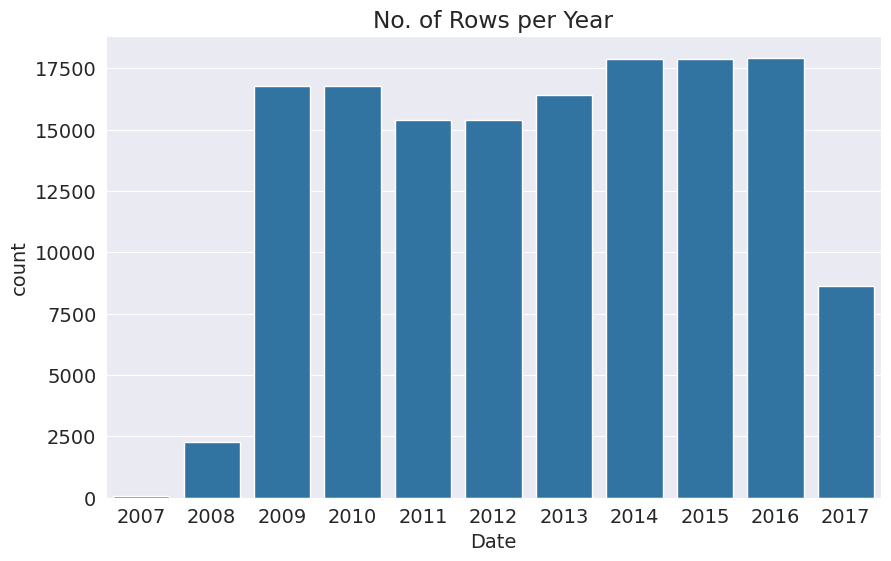

In [ ]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(df.Date).dt.year);

In [ ]:
year = pd.to_datetime(df.Date).dt.year

train_df = df[year < 2015]
val_df = df[year == 2015]
test_df =df[year > 2015]

In [ ]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (101018, 23)
val_df.shape : (17885, 23)
test_df.shape : (26557, 23)


In [ ]:
train_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144548  2014-12-27    Uluru     16.9     33.2       0.0          NaN   
144549  2014-12-28    Uluru     15.1     36.8       0.0          NaN   
144550  2014-12-29    Uluru     17.3     37.8       0.0          NaN   
144551  2014-12-30    Uluru     20.1     38.5       0.0          NaN   
144552  2014-12-31    Uluru     22.5     39.6       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
144548       NaN         SSE           43.0        ESE        SSE   
144549       NaN          NE           31.0        ENE         SW   
144550       NaN         ESE           39.0        ESE        SSE   
144551       NaN         ESE           43.0        ESE        SSW   
144552       NaN         WNW           76.0        ENE        SSW   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
144548          24.0          26.0         22.0         13.0       1014.1   
144549          19.0          20.0         16.0          8.0       1012.6   
144550          26.0           9.0         15.0          8.0       1011.9   
144551          28.0          17.0         22.0          9.0       1014.0   
144552          30.0          13.0         16.0          9.0       1012.1   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
144548       1009.8       NaN       NaN     23.7     31.8        No   
144549       1007.6       NaN       NaN     28.9     34.8        No   
144550       1008.0       NaN       NaN     29.7     35.7        No   
144551       1009.2       NaN       NaN     29.8     37.2        No   
144552       1006.2       NaN       NaN     30.1     37.4        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
144548           No  
144549           No  
144550           No  
144551           No  
144552           No  

[101018 rows x 23 columns]

In [ ]:
val_df


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2133    2015-01-01   Albury     11.4     33.5       0.0          NaN   
2134    2015-01-02   Albury     15.5     39.6       0.0          NaN   
2135    2015-01-03   Albury     17.1     38.3       0.0          NaN   
2136    2015-01-04   Albury     26.0     33.1       0.0          NaN   
2137    2015-01-05   Albury     19.0     35.2       0.0          NaN   
...            ...      ...      ...      ...       ...          ...   
144913  2015-12-27    Uluru     20.5     34.7       0.0          NaN   
144914  2015-12-28    Uluru     18.0     36.4       0.0          NaN   
144915  2015-12-29    Uluru     17.5     37.1       0.0          NaN   
144916  2015-12-30    Uluru     20.0     38.9       0.0          NaN   
144917  2015-12-31    Uluru     19.3     37.4       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
2133         NaN         WSW           30.0        ESE          W   
2134         NaN          NE           56.0        ESE        ESE   
2135         NaN         NNE           48.0         NE          N   
2136         NaN         NNE           41.0        ESE          W   
2137         NaN           E           33.0        SSE         SE   
...          ...         ...            ...        ...        ...   
144913       NaN           E           52.0        ESE          E   
144914       NaN         ESE           54.0          E        ESE   
144915       NaN           E           56.0          E         SE   
144916       NaN           E           59.0          E        SSE   
144917       NaN          SE           56.0        ESE          S   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
2133             7.0          11.0         45.0         14.0       1013.5   
2134             9.0           9.0         45.0         12.0       1016.0   
2135            20.0          20.0         35.0         19.0       1017.9   
2136             7.0           7.0         46.0         37.0       1013.6   
2137             7.0           9.0         60.0         34.0       1017.4   
...              ...           ...          ...          ...          ...   
144913          35.0          20.0         23.0         12.0       1013.2   
144914          30.0          31.0         17.0          7.0       1014.7   
144915          33.0          22.0         12.0          7.0       1012.6   
144916          20.0          17.0         12.0         12.0       1007.2   
144917          20.0          28.0         46.0         18.0       1007.3   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
2133         1011.0       NaN       NaN     21.0     32.7        No   
2134         1012.4       NaN       NaN     25.6     38.2        No   
2135         1012.3       NaN       NaN     29.2     37.0        No   
2136         1012.1       8.0       5.0     27.4     30.9        No   
2137         1014.7       8.0       NaN     25.6     32.5        No   
...             ...       ...       ...      ...      ...       ...   
144913       1010.1       NaN       NaN     24.3     33.0        No   
144914       1010.9       NaN       NaN     26.7     35.0        No   
144915       1007.5       NaN       NaN     28.1     34.7        No   
144916       1002.6       NaN       1.0     31.3     38.4        No   
144917       1003.7       NaN       NaN     25.8     35.8        No   

       RainTomorrow  
2133             No  
2134             No  
2135             No  
2136             No  
2137             No  
...             ...  
144913           No  
144914           No  
144915           No  
144916           No  
144917           No  

[17885 rows x 23 columns]

In [ ]:
test_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
2498    2016-01-01   Albury     20.4     37.6       0.0          NaN   
2499    2016-01-02   Albury     20.9     33.6       0.4          NaN   
2500    2016-01-03   Albury     18.4     23.1       2.2          NaN   
2501    2016-01-04   Albury     17.3     23.7      15.6          NaN   
2502    2016-01-05   Albury     15.5     22.9       6.8          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
2498         NaN         ENE           54.0        NaN        ESE   
2499         NaN         SSE           50.0        SSE         SE   
2500         NaN         ENE           48.0        ESE        ENE   
2501         NaN         SSE           39.0         SE        SSE   
2502         NaN         ENE           31.0         SE        SSE   
...          ...         ...            ...        ...        ...   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
2498             0.0           7.0         46.0         17.0       1013.4   
2499             9.0          17.0         54.0         30.0       1011.1   
2500            11.0          39.0         62.0         67.0       1014.0   
2501             9.0          17.0         74.0         65.0       1017.9   
2502             6.0           9.0         92.0         63.0       1016.3   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
2498         1009.2       7.0       3.0     26.1     36.7        No   
2499         1008.4       8.0       8.0     24.8     31.7        No   
2500         1014.8       8.0       8.0     21.8     19.5       Yes   
2501         1016.5       8.0       8.0     19.2     21.6       Yes   
2502         1013.9       8.0       8.0     17.2     22.2       Yes   
...             ...       ...       ...      ...      ...       ...   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
2498             No  
2499            Yes  
2500            Yes  
2501            Yes  
2502             No  
...             ...  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN  

[26557 rows x 23 columns]

In [ ]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [ ]:
print(input_cols)


['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [ ]:
target_col


'RainTomorrow'

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [ ]:
train_inputs


Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0          NaN       NaN   
144549    Uluru     15.1     36.8       0.0          NaN       NaN   
144550    Uluru     17.3     37.8       0.0          NaN       NaN   
144551    Uluru     20.1     38.5       0.0          NaN       NaN   
144552    Uluru     22.5     39.6       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0                W           44.0          W        WNW          20.0   
1              WNW           44.0        NNW        WSW           4.0   
2              WSW           46.0          W        WSW          19.0   
3               NE           24.0         SE          E          11.0   
4                W           41.0        ENE         NW           7.0   
...            ...            ...        ...        ...           ...   
144548         SSE           43.0        ESE        SSE          24.0   
144549          NE           31.0        ENE         SW          19.0   
144550         ESE           39.0        ESE        SSE          26.0   
144551         ESE           43.0        ESE        SSW          28.0   
144552         WNW           76.0        ENE        SSW          30.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0               24.0         71.0         22.0       1007.7       1007.1   
1               22.0         44.0         25.0       1010.6       1007.8   
2               26.0         38.0         30.0       1007.6       1008.7   
3                9.0         45.0         16.0       1017.6       1012.8   
4               20.0         82.0         33.0       1010.8       1006.0   
...              ...          ...          ...          ...          ...   
144548          26.0         22.0         13.0       1014.1       1009.8   
144549          20.0         16.0          8.0       1012.6       1007.6   
144550           9.0         15.0          8.0       1011.9       1008.0   
144551          17.0         22.0          9.0       1014.0       1009.2   
144552          13.0         16.0          9.0       1012.1       1006.2   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  
0            8.0       NaN     16.9     21.8        No  
1            NaN       NaN     17.2     24.3        No  
2            NaN       2.0     21.0     23.2        No  
3            NaN       NaN     18.1     26.5        No  
4            7.0       8.0     17.8     29.7        No  
...          ...       ...      ...      ...       ...  
144548       NaN       NaN     23.7     31.8        No  
144549       NaN       NaN     28.9     34.8        No  
144550       NaN       NaN     29.7     35.7        No  
144551       NaN       NaN     29.8     37.2        No  
144552       NaN       NaN     30.1     37.4        No  

[101018 rows x 21 columns]

In [ ]:
train_targets


0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 101018, dtype: object

In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
train_inputs[numeric_cols].describe()


MinTemp        MaxTemp     Rainfall   Evaporation      Sunshine  \
count  100282.000000  100484.000000  98987.00000  62532.000000  59010.000000   
mean       11.992238      22.981287      2.38158      5.282092      7.593952   
std         6.336489       6.994097      8.51861      3.949170      3.790480   
min        -8.500000      -4.100000      0.00000      0.000000      0.000000   
25%         7.500000      17.800000      0.00000      2.600000      4.800000   
50%        11.800000      22.400000      0.00000      4.600000      8.400000   
75%        16.600000      27.900000      0.80000      7.200000     10.600000   
max        33.900000      48.100000    371.00000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   93395.000000  99564.000000  99556.000000  99428.000000  99514.000000   
mean       40.265892     14.127898     18.777813     68.694231     51.552445   
std        13.729898      9.008386      8.882133     18.981489     20.739573   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     20.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  91218.000000  91252.000000  63913.000000  62888.000000  99913.000000   
mean    1017.520623   1015.144023      4.316712      4.421559     16.812393   
std        7.075771      6.998990      2.867476      2.693835      6.393443   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.500000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.300000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

             Temp3pm  
count  100040.000000  
mean       21.506126  
std         6.832900  
min        -5.100000  
25%        16.500000  
50%        20.900000  
75%        26.100000  
max        46.100000

In [ ]:
train_inputs[categorical_cols].nunique()


Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy = 'mean')


In [ ]:
df[numeric_cols].isna().sum()


MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

In [ ]:
train_inputs[numeric_cols].isna().sum()


MinTemp            736
MaxTemp            534
Rainfall          2031
Evaporation      38486
Sunshine         42008
WindGustSpeed     7623
WindSpeed9am      1454
WindSpeed3pm      1462
Humidity9am       1590
Humidity3pm       1504
Pressure9am       9800
Pressure3pm       9766
Cloud9am         37105
Cloud3pm         38130
Temp9am           1105
Temp3pm            978
dtype: int64

In [ ]:
imputer.fit(df[numeric_cols])




SimpleImputer()

In [ ]:
list(imputer.statistics_)


[12.19403438096892,
 23.22134827564685,
 2.3609181499166656,
 5.468231522922462,
 7.6111775206611565,
 40.03523007167319,
 14.043425914971502,
 18.662656778887342,
 68.88083133761887,
 51.5391158755046,
 1017.6499397983052,
 1015.2558888309618,
 4.4474612602152455,
 4.509930082924903,
 16.990631415587398,
 21.68339031800974]

In [ ]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])train_inputs[numeric_cols].isna().sum()


SyntaxError: invalid syntax (<ipython-input-132-fbdb929a3a96>, line 3)

In [ ]:
train_inputs[numeric_cols].isna().sum()


MinTemp            736
MaxTemp            534
Rainfall          2031
Evaporation      38486
Sunshine         42008
WindGustSpeed     7623
WindSpeed9am      1454
WindSpeed3pm      1462
Humidity9am       1590
Humidity3pm       1504
Pressure9am       9800
Pressure3pm       9766
Cloud9am         37105
Cloud3pm         38130
Temp9am           1105
Temp3pm            978
dtype: int64

In [ ]:
df[numeric_cols].describe()



MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[numeric_cols])


MinMaxScaler()

In [ ]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[-8.5,
 -4.8,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 980.5,
 977.1,
 0.0,
 0.0,
 -7.2,
 -5.4]

In [ ]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[33.9,
 48.1,
 371.0,
 145.0,
 14.5,
 135.0,
 130.0,
 87.0,
 100.0,
 100.0,
 1041.0,
 1039.6,
 9.0,
 9.0,
 40.2,
 46.7]

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs[numeric_cols].describe()


MinTemp        MaxTemp      Rainfall   Evaporation      Sunshine  \
count  100282.000000  100484.000000  98987.000000  62532.000000  59010.000000   
mean        0.483307       0.525166      0.006419      0.036428      0.523721   
std         0.149445       0.132214      0.022961      0.027236      0.261412   
min         0.000000       0.013233      0.000000      0.000000      0.000000   
25%         0.377358       0.427221      0.000000      0.017931      0.331034   
50%         0.478774       0.514178      0.000000      0.031724      0.579310   
75%         0.591981       0.618147      0.002156      0.049655      0.731034   
max         1.000000       1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   93395.000000  99564.000000  99556.000000  99428.000000  99514.000000   
mean        0.265627      0.108676      0.215837      0.686942      0.515524   
std         0.106433      0.069295      0.102093      0.189815      0.207396   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.218391      0.700000      0.520000   
75%         0.325581      0.153846      0.275862      0.830000      0.660000   
max         1.000000      0.669231      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  91218.000000  91252.000000  63913.000000  62888.000000  99913.000000   
mean       0.611911      0.608704      0.479635      0.491284      0.506591   
std        0.116955      0.111984      0.318608      0.299315      0.134883   
min        0.000000      0.030400      0.000000      0.000000      0.027426   
25%        0.533884      0.532800      0.111111      0.222222      0.409283   
50%        0.611570      0.608000      0.555556      0.555556      0.500000   
75%        0.690909      0.684800      0.777778      0.777778      0.601266   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             Temp3pm  
count  100040.000000  
mean        0.516432  
std         0.131150  
min         0.005758  
25%         0.420345  
50%         0.504798  
75%         0.604607  
max         0.988484

In [ ]:
df[categorical_cols].nunique()


Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(df[categorical_cols])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [ ]:
encoder.categories_


[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))


In [ ]:
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [ ]:
pd.set_option('display.max_columns', None)

test_inputs


Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury  0.681604  0.801512  0.000000          NaN       NaN   
2499     Albury  0.693396  0.725898  0.001078          NaN       NaN   
2500     Albury  0.634434  0.527410  0.005930          NaN       NaN   
2501     Albury  0.608491  0.538752  0.042049          NaN       NaN   
2502     Albury  0.566038  0.523629  0.018329          NaN       NaN   
...         ...       ...       ...       ...          ...       ...   
145455    Uluru  0.266509  0.533081  0.000000          NaN       NaN   
145456    Uluru  0.285377  0.568998  0.000000          NaN       NaN   
145457    Uluru  0.327830  0.599244  0.000000          NaN       NaN   
145458    Uluru  0.384434  0.601134  0.000000          NaN       NaN   
145459    Uluru  0.551887       NaN  0.000000          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498           ENE       0.372093        NaN        ESE      0.000000   
2499           SSE       0.341085        SSE         SE      0.069231   
2500           ENE       0.325581        ESE        ENE      0.084615   
2501           SSE       0.255814         SE        SSE      0.069231   
2502           ENE       0.193798         SE        SSE      0.046154   
...            ...            ...        ...        ...           ...   
145455           E       0.193798         SE        ENE      0.100000   
145456         NNW       0.124031         SE          N      0.100000   
145457           N       0.240310         SE        WNW      0.069231   
145458          SE       0.170543        SSE          N      0.100000   
145459         NaN            NaN        ESE        ESE      0.130769   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2498        0.080460         0.46         0.17     0.543802       0.5136   
2499        0.195402         0.54         0.30     0.505785       0.5008   
2500        0.448276         0.62         0.67     0.553719       0.6032   
2501        0.195402         0.74         0.65     0.618182       0.6304   
2502        0.103448         0.92         0.63     0.591736       0.5888   
...              ...          ...          ...          ...          ...   
145455      0.126437         0.51         0.24     0.728926       0.6912   
145456      0.103448         0.56         0.21     0.710744       0.6720   
145457      0.103448         0.53         0.24     0.669421       0.6352   
145458      0.080460         0.51         0.24     0.642975       0.6304   
145459      0.195402         0.62         0.36     0.656198       0.6528   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2498    0.777778  0.333333  0.702532  0.808061        No                0.0   
2499    0.888889  0.888889  0.675105  0.712092        No                0.0   
2500    0.888889  0.888889  0.611814  0.477927       Yes                0.0   
2501    0.888889  0.888889  0.556962  0.518234       Yes                0.0   
2502    0.888889  0.888889  0.514768  0.529750       Yes                0.0   
...          ...       ...       ...       ...       ...                ...   
145455       NaN       NaN  0.364979  0.533589        No                0.0   
145456       NaN       NaN  0.381857  0.573896        No                0.0   
145457       NaN       NaN  0.415612  0.604607        No                0.0   
145458  0.333333  0.222222  0.470464  0.602687        No                0.0   
145459  0.888889  0.888889  0.468354  0.504798        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
2498                0.0              1.0                    0.0   
2499                0.0              1.0                    0.0   
2500                0.0              1.0                    0.0   
2501                0.0              1.0                    0.0   
2502                0.0              1.0                    0.0   
.

In [ ]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (101018, 124)
train_targets: (101018,)
val_inputs: (17885, 124)
val_targets: (17885,)
test_inputs: (26557, 124)
test_targets: (26557,)


In [ ]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [ ]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

CPU times: user 63.1 ms, sys: 18 ms, total: 81.2 ms
Wall time: 97.8 ms


In [ ]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

CPU times: user 330 ms, sys: 238 ms, total: 568 ms
Wall time: 355 ms


In [ ]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (101018, 124)
train_targets: (101018,)
val_inputs: (17885, 124)
val_targets: (17885,)
test_inputs: (26557, 124)
test_targets: (26557,)


In [ ]:
val_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2133     Albury  0.469340  0.724008       0.0          NaN       NaN   
2134     Albury  0.566038  0.839319       0.0          NaN       NaN   
2135     Albury  0.603774  0.814745       0.0          NaN       NaN   
2136     Albury  0.813679  0.716446       0.0          NaN       NaN   
2137     Albury  0.648585  0.756144       0.0          NaN       NaN   
...         ...       ...       ...       ...          ...       ...   
144913    Uluru  0.683962  0.746692       0.0          NaN       NaN   
144914    Uluru  0.625000  0.778828       0.0          NaN       NaN   
144915    Uluru  0.613208  0.792060       0.0          NaN       NaN   
144916    Uluru  0.672170  0.826087       0.0          NaN       NaN   
144917    Uluru  0.655660  0.797732       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2133           WSW       0.186047        ESE          W      0.053846   
2134            NE       0.387597        ESE        ESE      0.069231   
2135           NNE       0.325581         NE          N      0.153846   
2136           NNE       0.271318        ESE          W      0.053846   
2137             E       0.209302        SSE         SE      0.053846   
...            ...            ...        ...        ...           ...   
144913           E       0.356589        ESE          E      0.269231   
144914         ESE       0.372093          E        ESE      0.230769   
144915           E       0.387597          E         SE      0.253846   
144916           E       0.410853          E        SSE      0.153846   
144917          SE       0.387597        ESE          S      0.153846   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2133        0.126437         0.45         0.14     0.545455       0.5424   
2134        0.103448         0.45         0.12     0.586777       0.5648   
2135        0.229885         0.35         0.19     0.618182       0.5632   
2136        0.080460         0.46         0.37     0.547107       0.5600   
2137        0.103448         0.60         0.34     0.609917       0.6016   
...              ...          ...          ...          ...          ...   
144913      0.229885         0.23         0.12     0.540496       0.5280   
144914      0.356322         0.17         0.07     0.565289       0.5408   
144915      0.252874         0.12         0.07     0.530579       0.4864   
144916      0.195402         0.12         0.12     0.441322       0.4080   
144917      0.321839         0.46         0.18     0.442975       0.4256   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2133         NaN       NaN  0.594937  0.731286        No                0.0   
2134         NaN       NaN  0.691983  0.836852        No                0.0   
2135         NaN       NaN  0.767932  0.813820        No                0.0   
2136    0.888889  0.555556  0.729958  0.696737        No                0.0   
2137    0.888889       NaN  0.691983  0.727447        No                0.0   
...          ...       ...       ...       ...       ...                ...   
144913       NaN       NaN  0.664557  0.737044        No                0.0   
144914       NaN       NaN  0.715190  0.775432        No                0.0   
144915       NaN       NaN  0.744726  0.769674        No                0.0   
144916       NaN  0.111111  0.812236  0.840691        No                0.0   
144917       NaN       NaN  0.696203  0.790787        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
2133                0.0              1.0                    0.0   
2134                0.0              1.0                    0.0   
2135                0.0              1.0                    0.0   
2136                0.0              1.0                    0.0   
2137                0.0              1.0                    0.0   
.

In [ ]:
val_targets

2133      No
2134      No
2135      No
2136      No
2137      No
          ..
144913    No
144914    No
144915    No
144916    No
144917    No
Name: RainTomorrow, Length: 17885, dtype: object

In [ ]:
import pandas as pd
train_inputs = pd.DataFrame(train_inputs)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')


In [ ]:
model.fit(train_inputs[numeric_cols+encoded_cols],train_targets)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values